- Nama : Rizky Mardhatillah

- ID_Student : PYTN-KS019-022

## SIB Batch 5 Kampus Merdeka
Dalam project ini menggunakan beberapa model machine learning ensemble - random forest - boosting untuk melakukan prediksi.
# Projects Overview
Data ini memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung.
## Attribute Information:
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

## Import pustaka dasar 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Impor fungsi-fungsi dari scikit-learn (sklearn)

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import make_scorer, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Loading

In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
# Mencari nilai null dalam dataset
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# EDA (Exploratory Data Analysis)

In [6]:
df.describe().reset_index()

,index,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
1,mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
2,std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
3,min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
4,25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
5,50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
6,75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
7,max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Histogram Data Non Kategorikal

In [7]:
data = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 
           'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

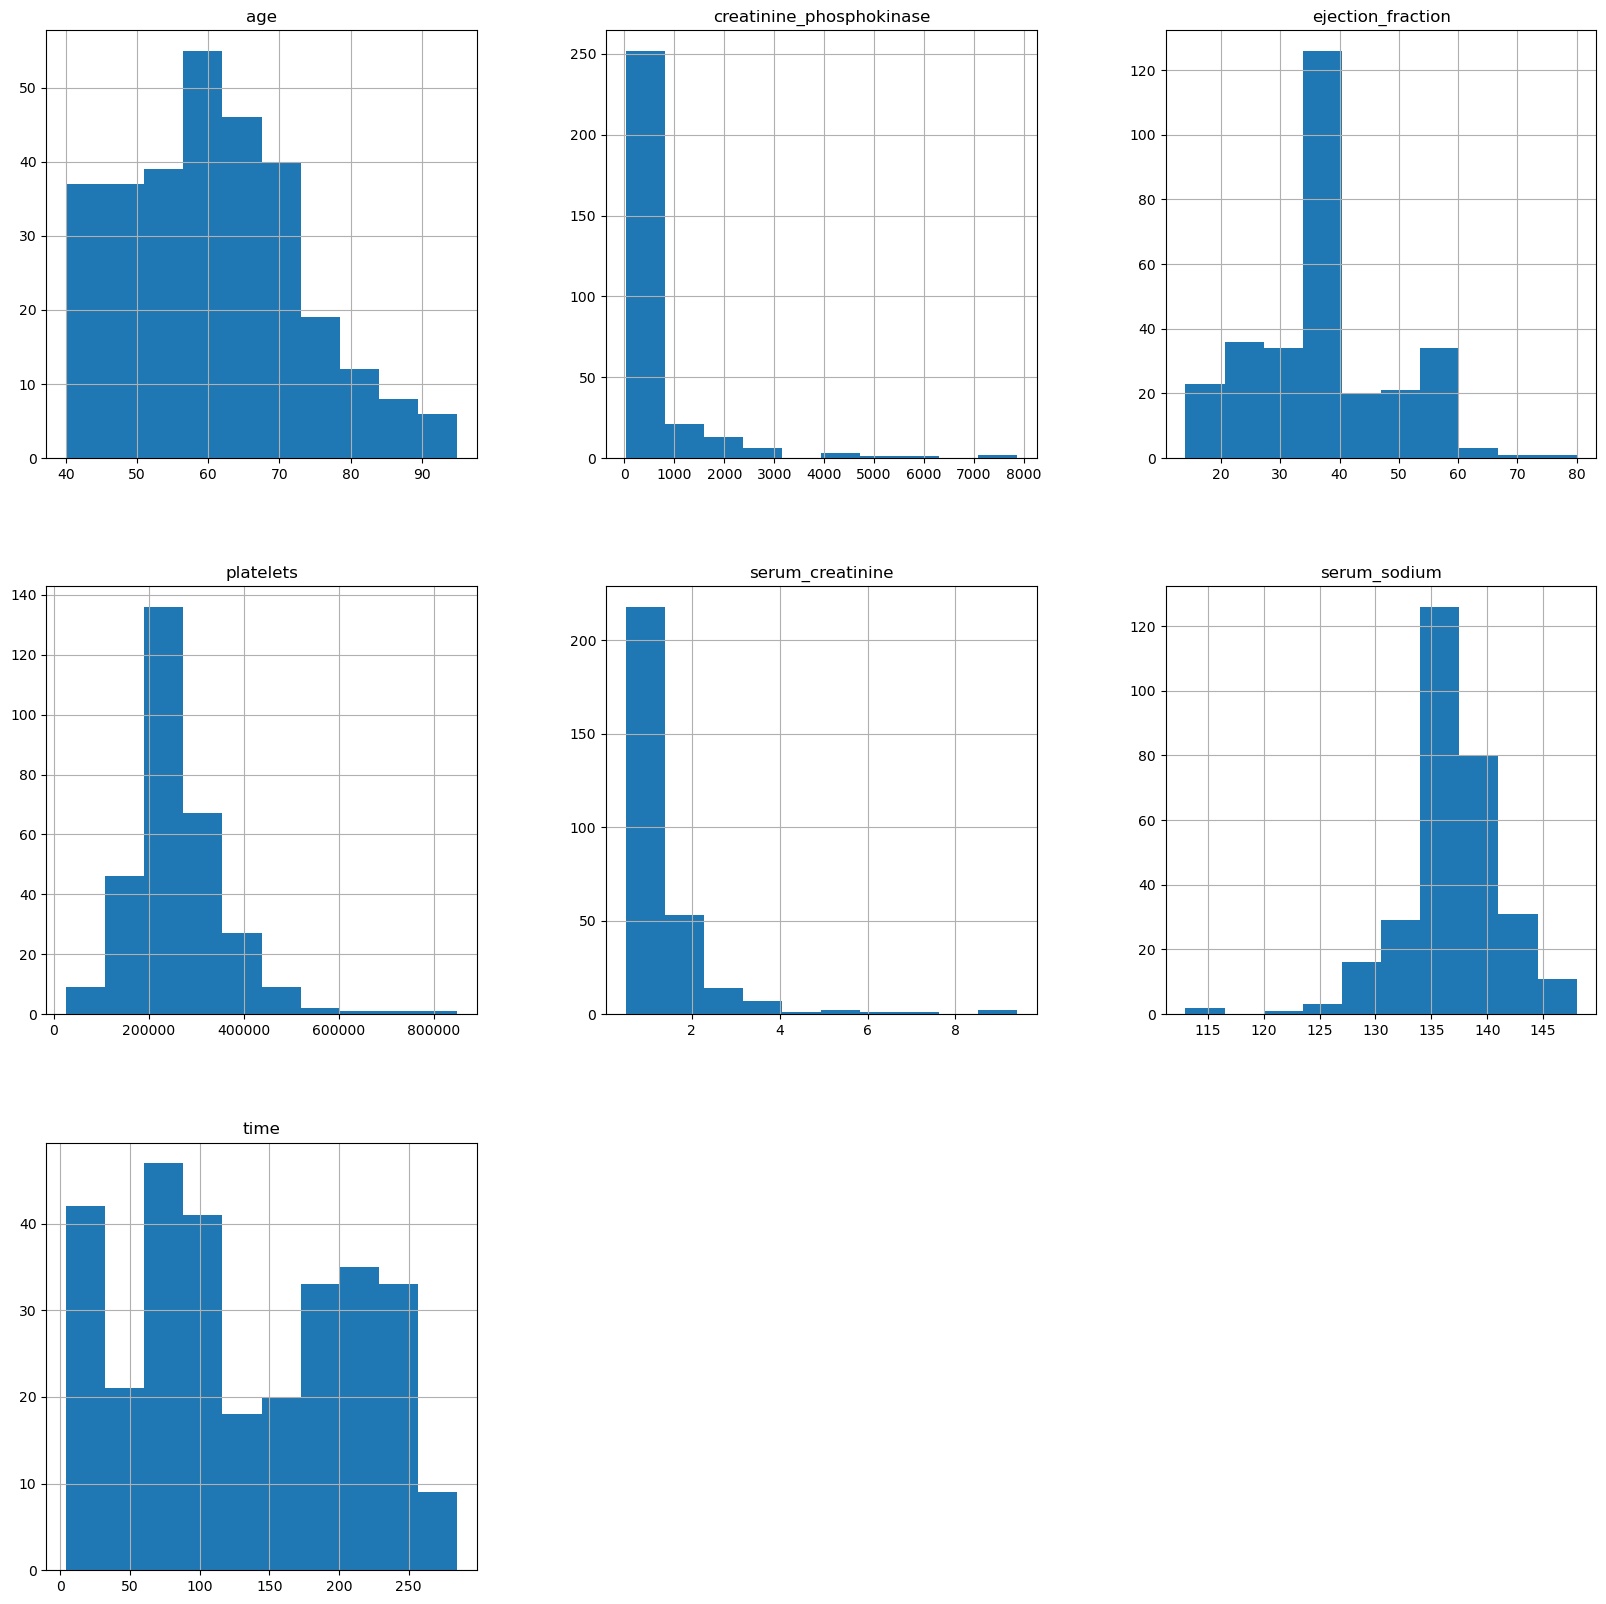

In [8]:
data.hist(figsize=(20,20))
plt.show()

Dari histogram diatas kita dapat mengetahui distribusi untuk kolom non kategorikal

## Grafik Skewness Variabel

Dalam analisis ini, kita menggunakan histogram untuk menunjukkan distribusi variabel dan menambahkan garis vertikal untuk menandai skewness.

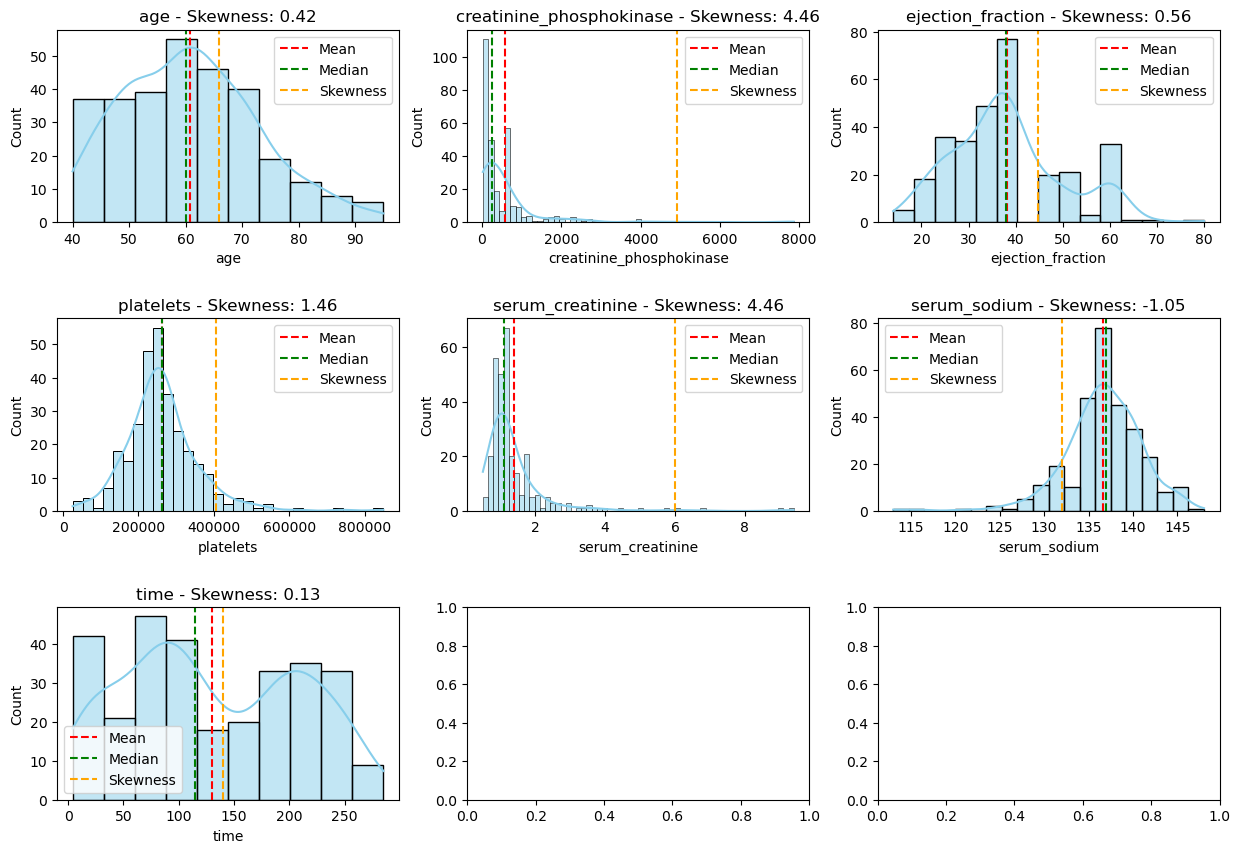

In [9]:
# Variabel yang ingin dianalisis
data = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 
             'serum_creatinine', 'serum_sodium', 'time']

# Membuat subplot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Iterasi untuk setiap variabel
for i, var in enumerate(data):
    row = i // 3
    col = i % 3
    
    # Membuat histogram
    sns.histplot(df[var], ax=axes[row, col], kde=True, color='skyblue')
    
    # Menandai skewness dengan garis vertikal
    skewness = df[var].skew()
    axes[row, col].axvline(x=df[var].mean(), color='red', linestyle='--', label='Mean')
    axes[row, col].axvline(x=df[var].median(), color='green', linestyle='--', label='Median')
    axes[row, col].axvline(x=df[var].mean() + (skewness * df[var].std()), color='orange', linestyle='--', label='Skewness')
    
    # Menambahkan label dan judul
    axes[row, col].set_title(f'{var} - Skewness: {skewness:.2f}')
    axes[row, col].set_xlabel(var)
    axes[row, col].legend()

plt.show()

Distribusi Variabel:

- Jika distribusi variabel mendekati simetris, skewnessnya mendekati 0.
- Jika skewness positif, distribusi cenderung miring ke kanan (ekor distribusi di sebelah kanan lebih panjang).
- Jika skewness negatif, distribusi cenderung miring ke kiri (ekor distribusi di sebelah kiri lebih panjang).

Pengaruh Outlier:

- Variabel dengan skewness yang tinggi dapat menunjukkan adanya outlier atau nilai ekstrim.

Perbandingan Rata-rata dan Median:

- Perbandingan antara rata-rata (garis merah) dan median (garis hijau) dapat memberikan informasi tambahan tentang bentuk distribusi.
- Jika median lebih dekat ke ekor distribusi, skewnessnya mungkin disebabkan oleh nilai-nilai ekstrim.

## Data Visualization

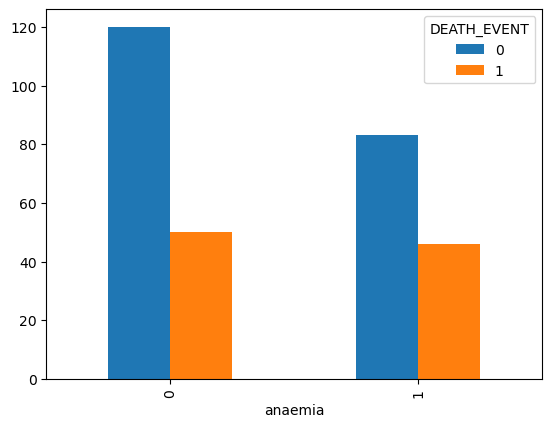

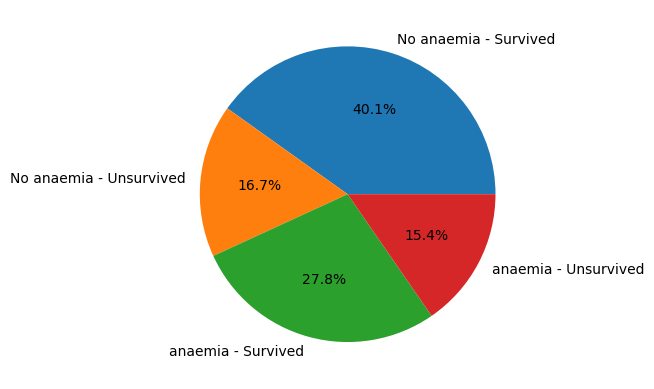

In [10]:
grouped_anaemia= df.groupby(['anaemia', 'DEATH_EVENT']).size()
grouped_anaemia.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_anaemia, labels=['No anaemia - Survived', 'No anaemia - Unsurvived', 'anaemia - Survived', 'anaemia - Unsurvived'], autopct='%1.1f%%')
plt.show()

Visualisasi anemia diatas menunjukan bahwa perbandingan antara populasi baik yang mengalami pengurangan hemoglobin (anemia) atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi populasi yang meninggal lebih banyak yang tidak mengalami penurunan hemoglobin (anemia), begitupun untuk frekuensi populasi yang tidak meninggal lebih banyak yang tidak mengalamai penurunan hemoglobin (anemia).

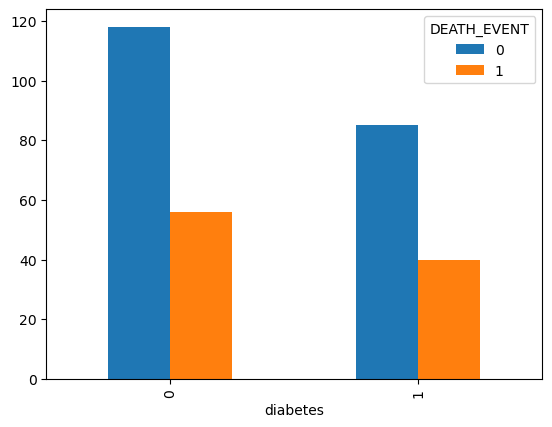

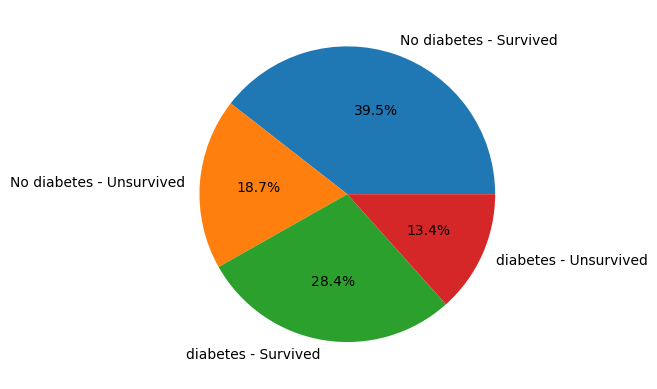

In [11]:
# Diabetes

grouped_diabetes= df.groupby(['diabetes', 'DEATH_EVENT']).size()
grouped_diabetes.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_diabetes, labels=['No diabetes - Survived', 'No diabetes - Unsurvived', 'diabetes - Survived', 'diabetes - Unsurvived'], autopct='%1.1f%%')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mengidap diabetes atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mengidap diabetes, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mengidap diabetes.

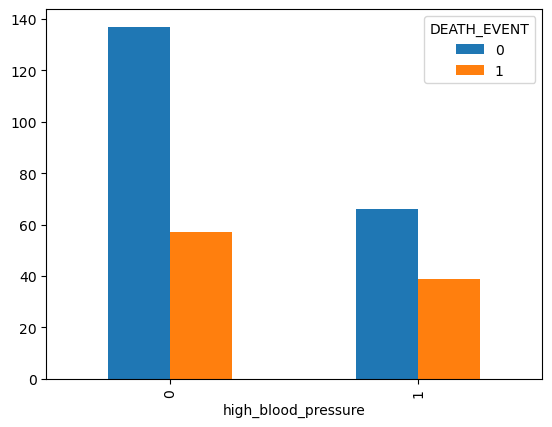

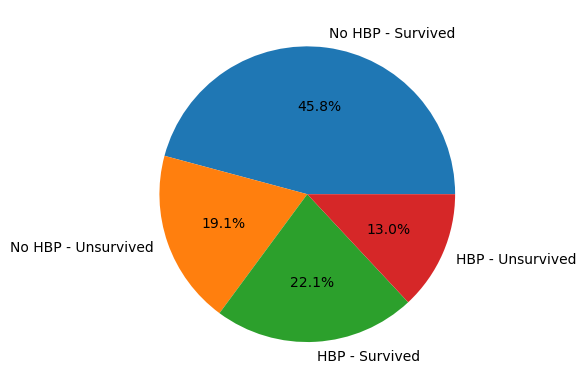

In [12]:
# high_blood_pressure

grouped_high_blood_pressure= df.groupby(['high_blood_pressure', 'DEATH_EVENT']).size()
grouped_high_blood_pressure.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_high_blood_pressure, labels=['No HBP - Survived', 'No HBP - Unsurvived', 'HBP - Survived', 'HBP - Unsurvived'], autopct='%1.1f%%')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mempunyai darah tinggi atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mempunyai darah tinggi, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mempunyai darah tinggi.

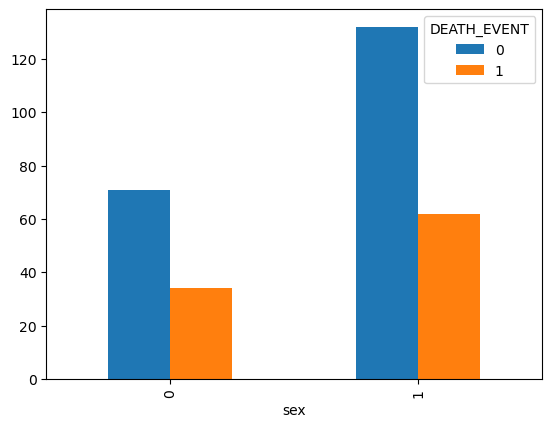

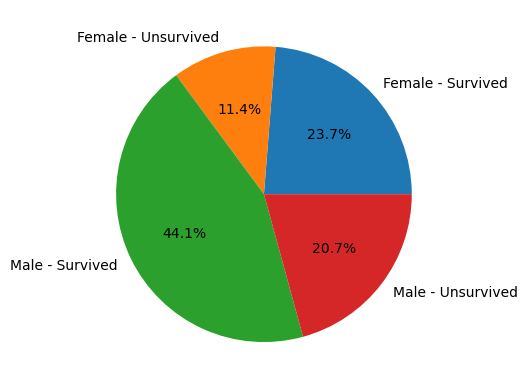

In [13]:
# Sex

grouped_sex= df.groupby(['sex', 'DEATH_EVENT']).size()
grouped_sex.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_sex, labels=['Female - Survived', 'Female - Unsurvived', 'Male - Survived', 'Male - Unsurvived'], autopct='%1.1f%%')
plt.show()

Pada visualisasi di atas, frekuensi seseorang yang meninggal lebih banyak berjenis kelamin pria dibandingkan wanita, begitupun dengan frekuensi seseorang yang tidak meninggal lebih banyak yang berjenis kelamin pria.

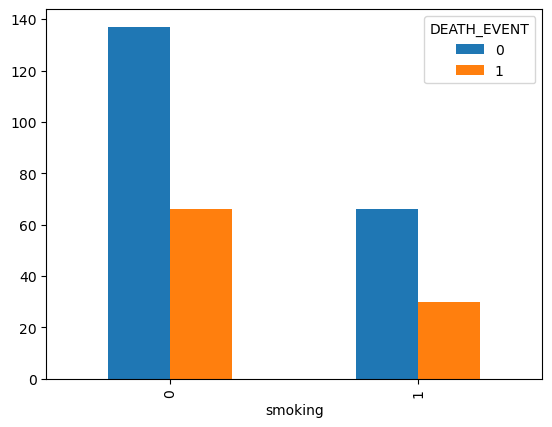

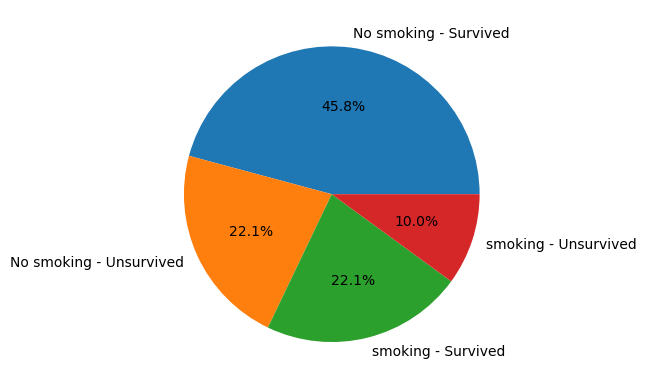

In [14]:
# smoking

grouped_smoking= df.groupby(['smoking', 'DEATH_EVENT']).size()
grouped_smoking.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_smoking, labels=['No smoking - Survived', 'No smoking - Unsurvived', 'smoking - Survived', 'smoking - Unsurvived'], autopct='%1.1f%%')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang merokok atau tidak, cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak merokok, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak merokok.

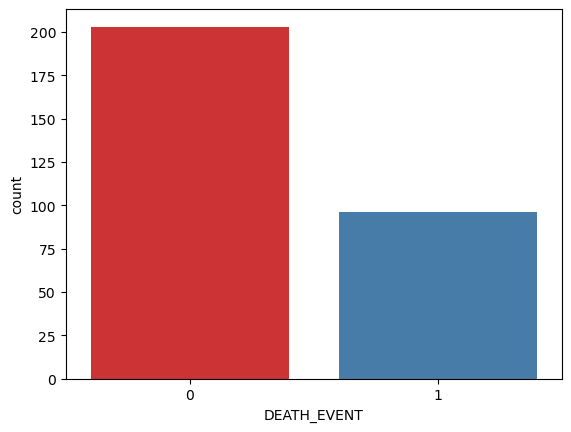

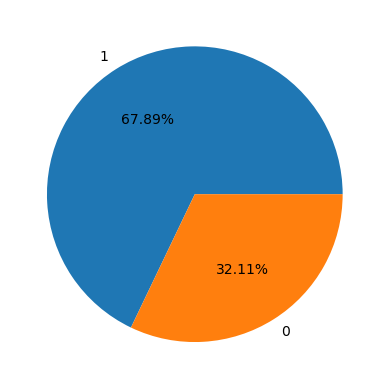

In [15]:
# DEATH_EVENT 
sns.countplot(x = 'DEATH_EVENT', data = df, palette = 'Set1')
plt.show()
plt.pie(x=df.DEATH_EVENT.value_counts().values,labels=df.DEATH_EVENT.unique().tolist(),autopct='%1.2f%%') 
plt.show()

Pada visualisasi di atas, dapat terlihat bahwa kolom DEATH_EVENT menunjukan data yang imbalanced. Imbalnaced sendiri merupakan suatu keadaan dimana distribusi kelas data tidak seimbang, jumlah kelas data (instance) yang satu lebih sedikit atau lebih banyak dibanding dengan jumlah kelas data lainnya. Selanjutnya akan kami lakukan penanganan agar data menjadi seimbang

## Persentase darah yang meninggalkan jantung vs. Level enzim CPK

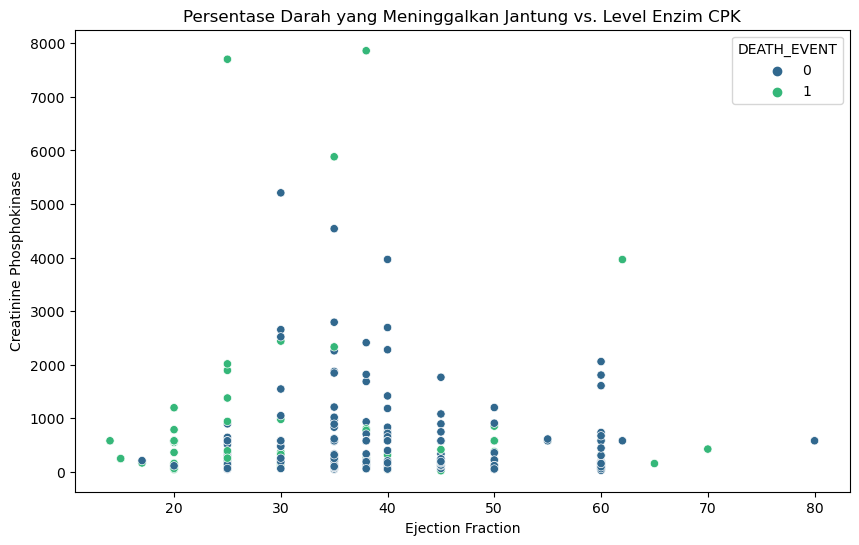

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ejection_fraction', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, palette='viridis')
plt.title('Persentase Darah yang Meninggalkan Jantung vs. Level Enzim CPK')
plt.xlabel('Ejection Fraction')
plt.ylabel('Creatinine Phosphokinase')
plt.show()

## Mencari korelasi antar kolom

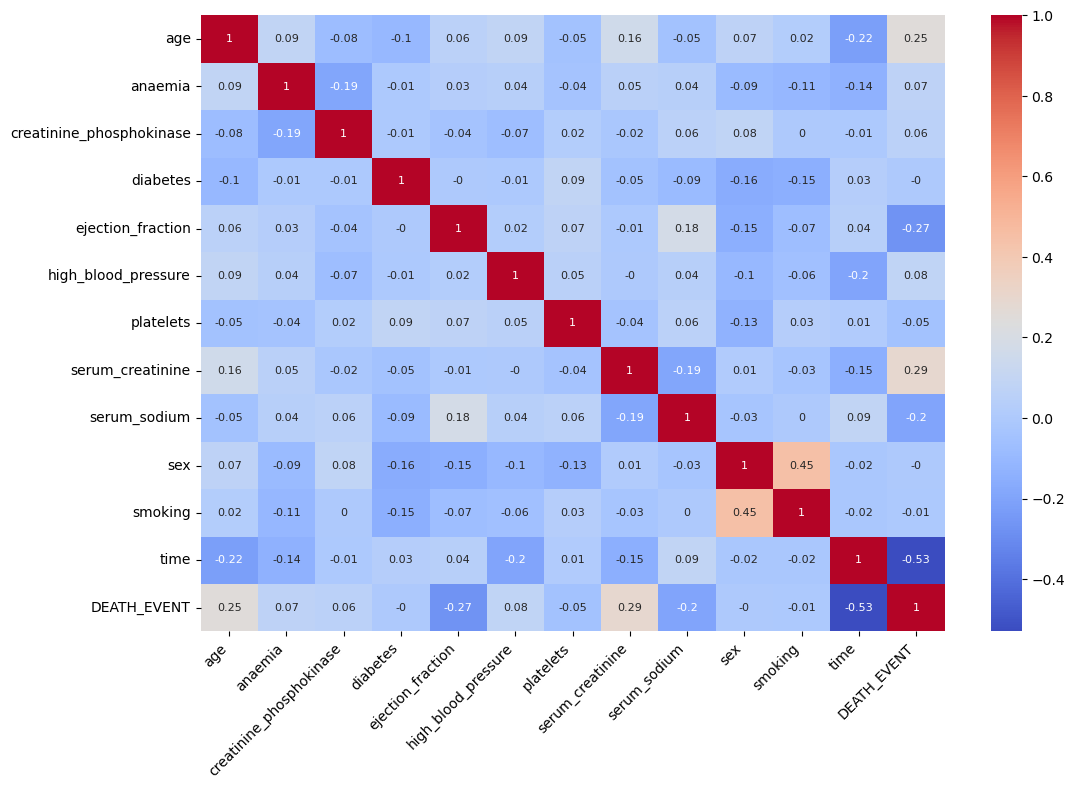

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', 
            xticklabels=df.corr().columns, 
            yticklabels=df.corr().columns, 
            annot_kws={"size": 8})
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

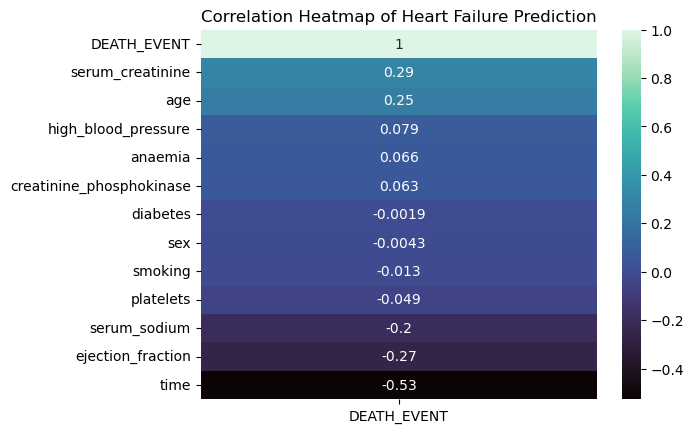

In [18]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True, cmap="mako")
plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

Heatmap diatas menunjukan bahwa nilai korelasi masing-masing variabel terhadap variabel DEATH_EVENT menunjukan angka yang cukup kecil. Variabel yang memiliki korelasi cukup tinggi terhadap variabel DEATH_EVENT adalah serum_creatinine dan variabel yang memiliki korelasi sangat rendah terhadap variabel DEATH_EVENT adalah variabel day.

## Analisa Outlier

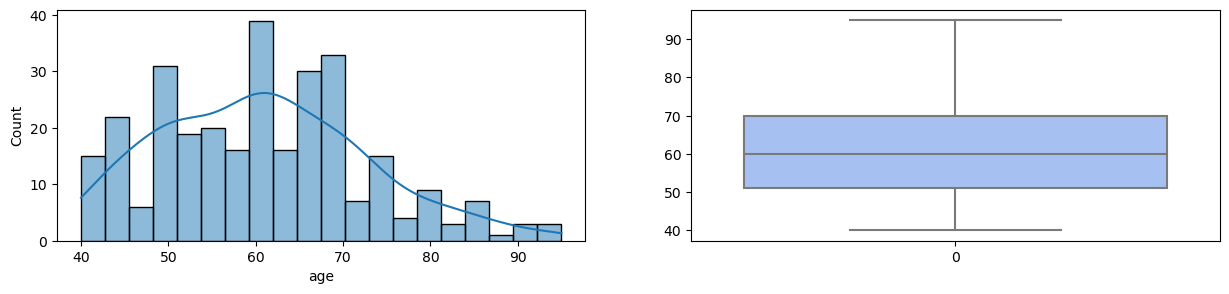

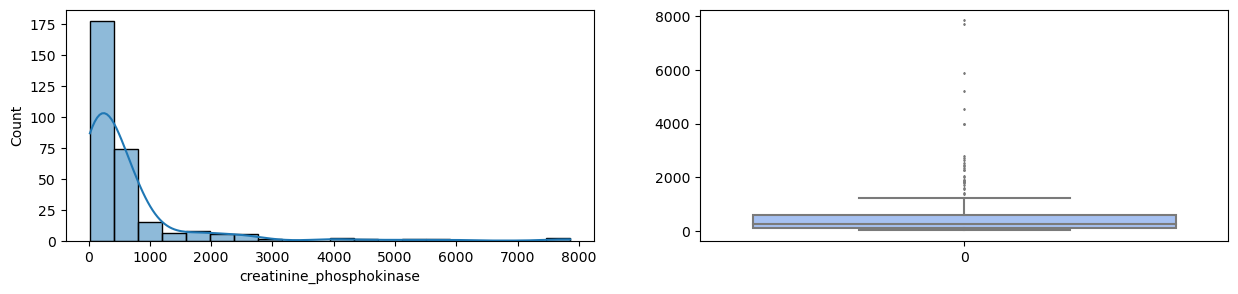

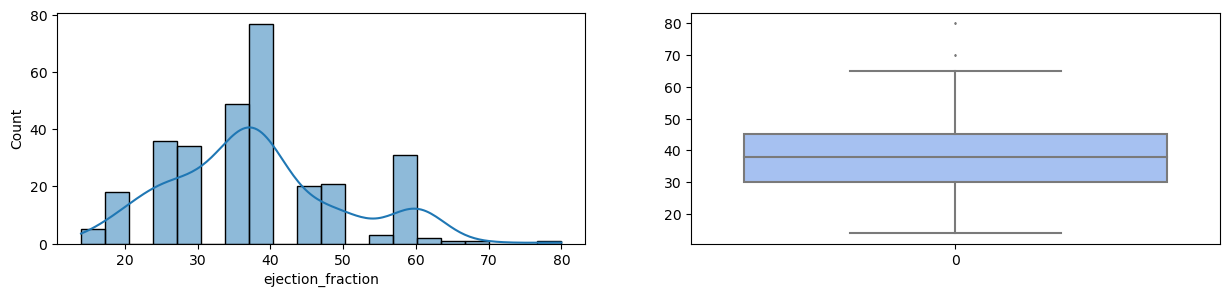

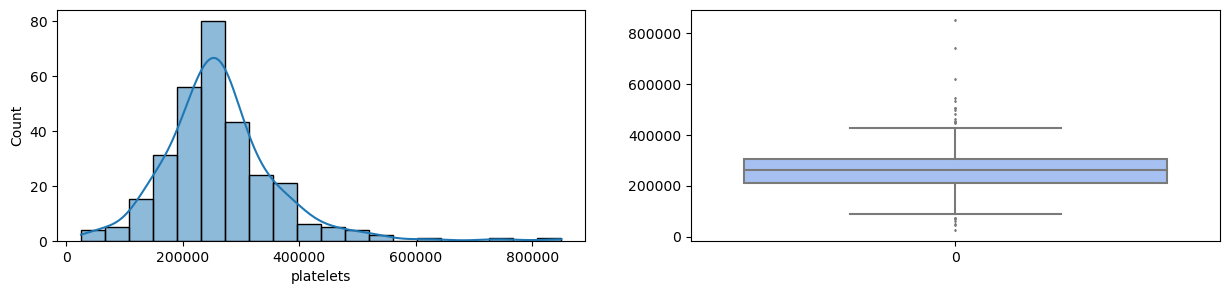

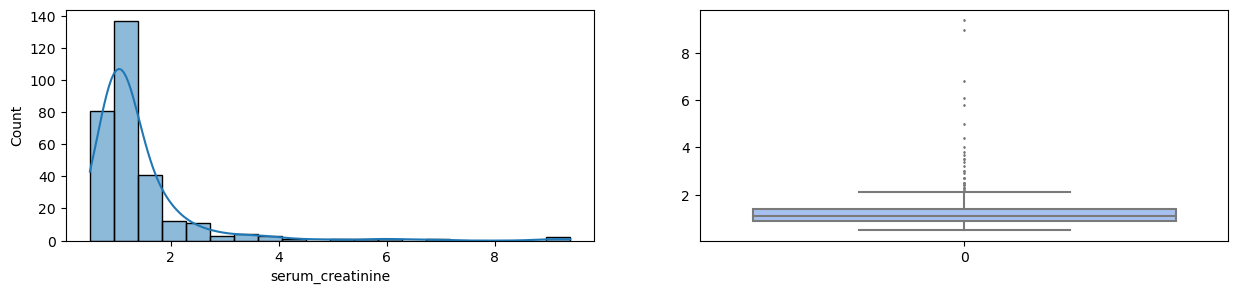

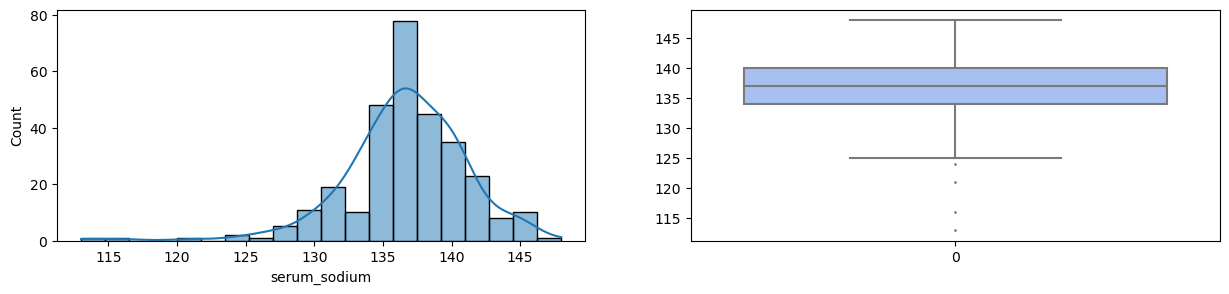

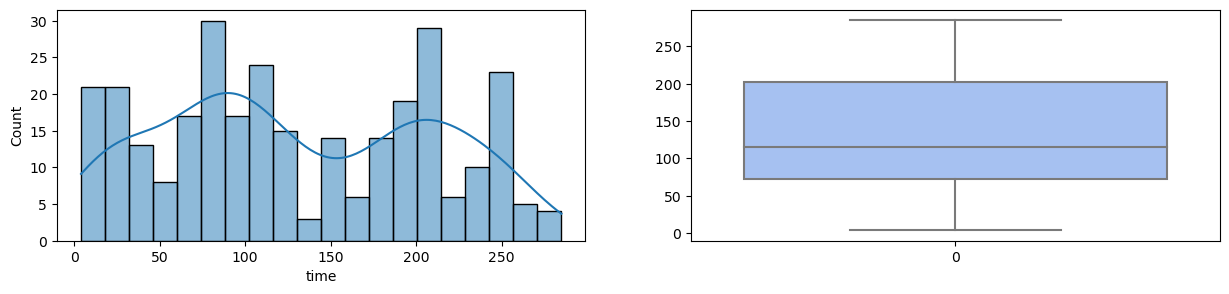

In [19]:
num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

## Outlier Handling

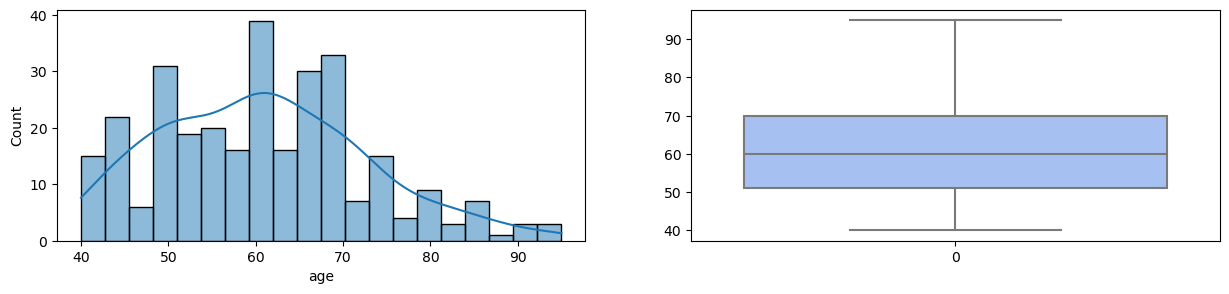

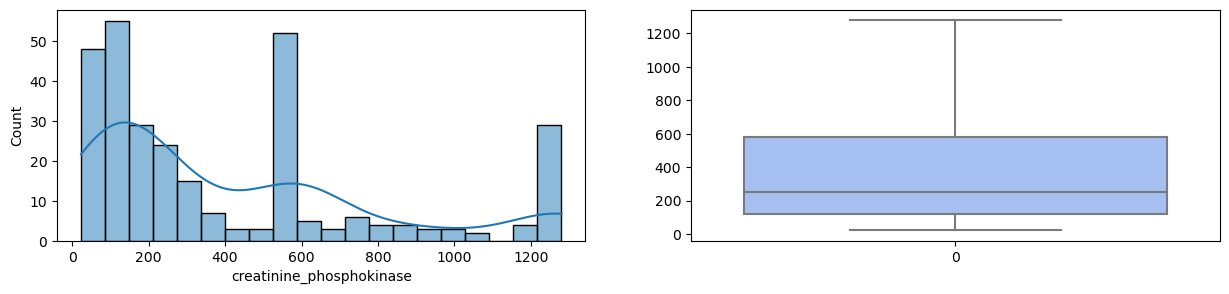

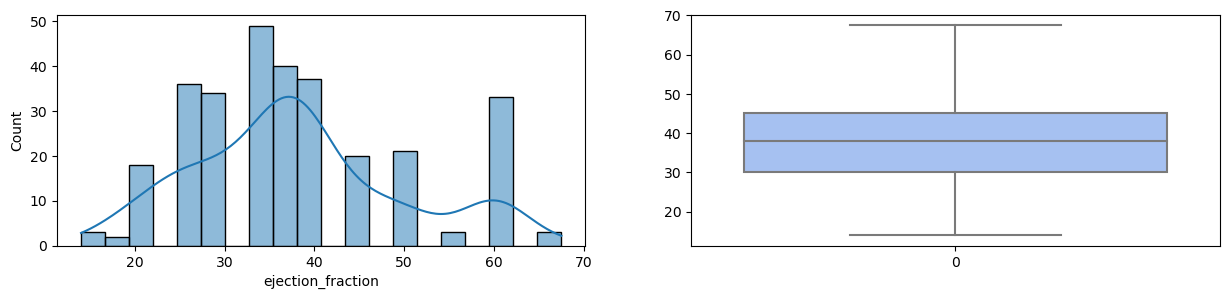

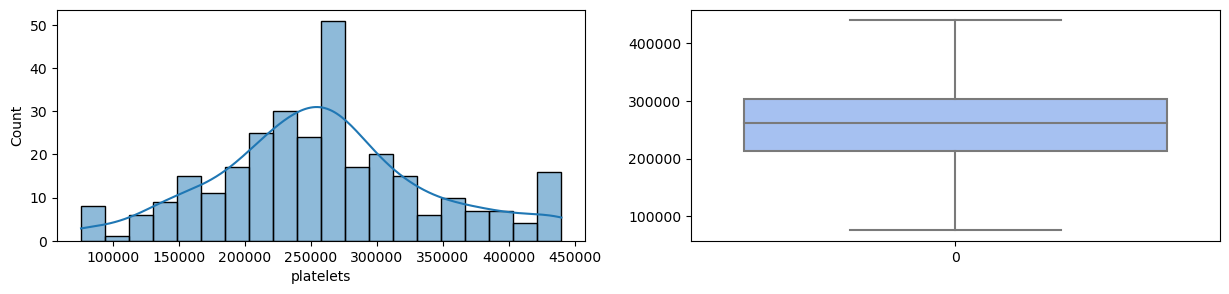

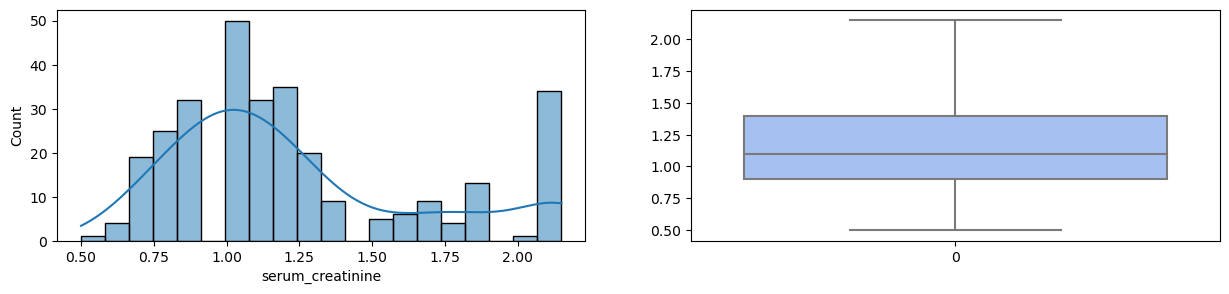

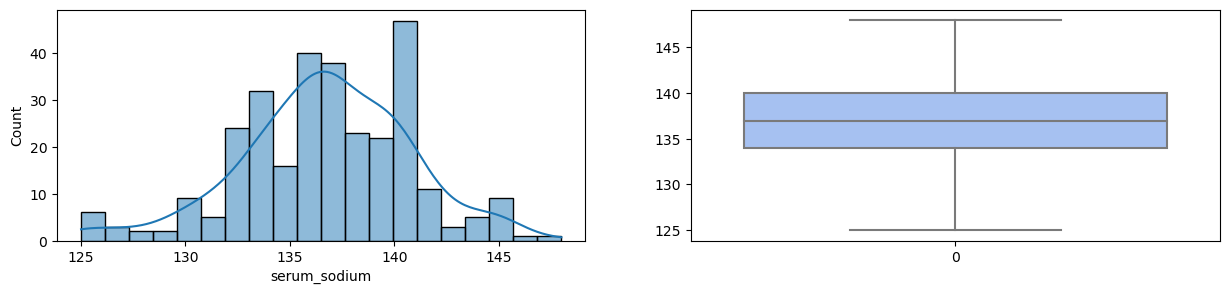

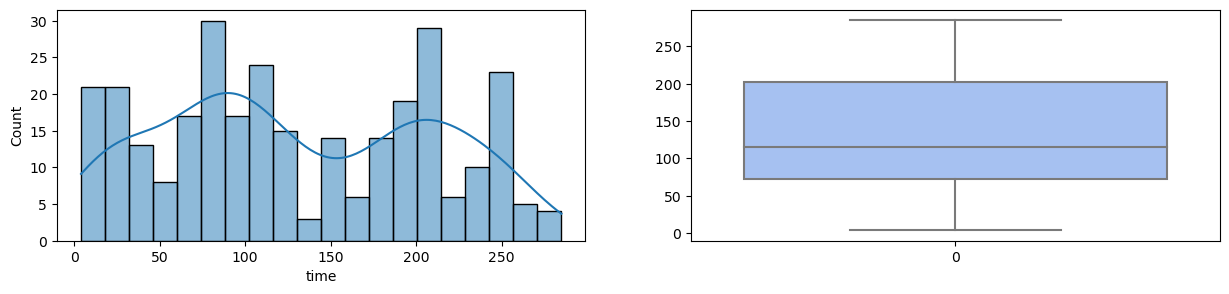

In [20]:
features_with_outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit
    
num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

# Modeling

## Feature Enginering

In [21]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [22]:
Features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
Target = ['DEATH_EVENT']

In [23]:
X = df[Features]
y = df[Target].values
split_test_size = 0.20
y = y.ravel()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=split_test_size, random_state=42)

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [26]:
rfc = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy:  0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.94      0.80        35
           1       0.85      0.44      0.58        25

    accuracy                           0.73        60
   macro avg       0.77      0.69      0.69        60
weighted avg       0.76      0.73      0.71        60



## Confusion Matrix

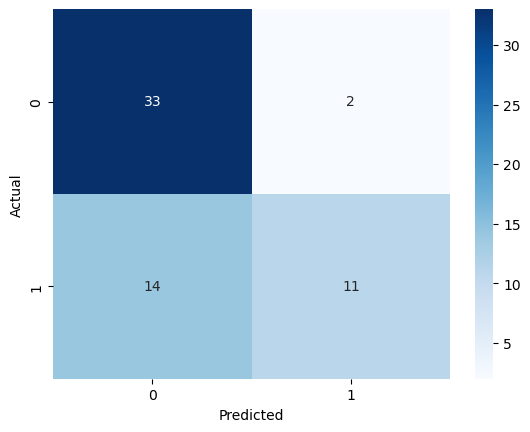

In [28]:
# Prediksi menggunakan model Random Forest
predictions = rfc.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, predictions, labels=rfc.classes_)

# Menampilkan confusion matrix dengan format angka tanpa eksponensial menggunakan heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rfc.classes_, yticklabels=rfc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
# Membuat DataFrame untuk hasil prediksi
result_df = pd.DataFrame(data=X_test.copy())
result_df['Actual'] = y_test
result_df['Predicted'] = y_pred

# Menampilkan hasil DataFrame
result_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Actual,Predicted
281,70.0,0,582.00,0,40.0,0,76000.00,2.15,136,1,1,250,0,0
265,50.0,1,298.00,0,35.0,0,362000.00,0.90,140,1,1,240,0,0
164,45.0,0,1280.25,1,30.0,0,334000.00,1.10,139,1,0,129,1,0
9,80.0,1,123.00,0,35.0,1,388000.00,2.15,133,1,1,10,1,1
77,42.0,0,102.00,1,40.0,0,237000.00,1.20,140,1,0,74,0,0
278,50.0,1,1051.00,1,30.0,0,232000.00,0.70,136,0,0,246,0,0
93,60.0,1,154.00,0,25.0,0,210000.00,1.70,135,1,0,82,1,0
109,45.0,0,292.00,1,35.0,0,440000.00,1.30,142,1,1,88,0,0
5,90.0,1,47.00,0,40.0,1,204000.00,2.10,132,1,1,8,1,1
173,50.0,1,115.00,0,20.0,0,189000.00,0.80,139,1,0,146,0,0


Dikarekan recall yang cukup rendah untuk kelas 1, maka kinerja model dapat dikatakan kurang

# Finding Important Features in scikit-learn

In [30]:
feature_names = X.columns

In [31]:
feature_imp = pd.Series(rfc.feature_importances_, index=feature_names).sort_values(ascending=False)

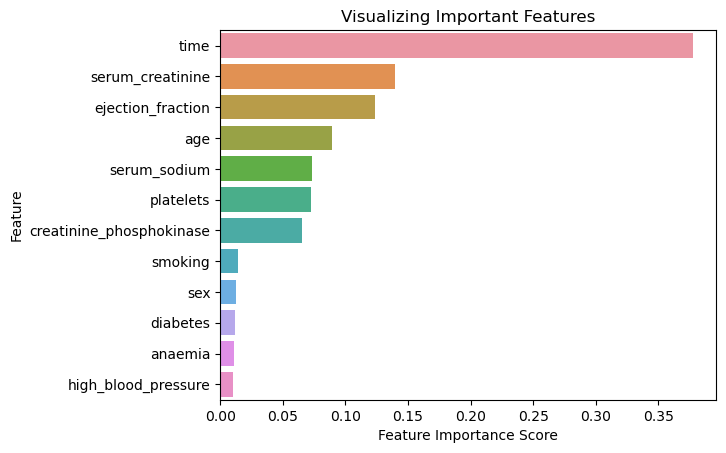

In [32]:
import seaborn as sns
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add Labels to graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title("Visualizing Important Features")
plt.show()

Terlihat bahwa variabel "time" sangat berpengaruh terhadap "DEATH_EVENT"

# Membuat model AdaBoost Classifier

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [36]:
adaboost_predictions = adaboost_model.predict(X_test)

# Evaluasi performa model
print("AdaBoost Accuracy:", accuracy_score(y_test, adaboost_predictions))
print("Classification Report:\n", classification_report(y_test, adaboost_predictions))

AdaBoost Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77        35
           1       0.71      0.48      0.57        25

    accuracy                           0.70        60
   macro avg       0.70      0.67      0.67        60
weighted avg       0.70      0.70      0.69        60



## Counfusion Matrix

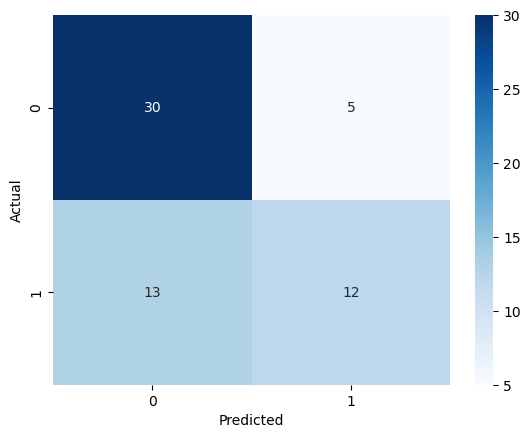

In [37]:
cm = confusion_matrix(y_test, adaboost_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# Membuat DataFrame untuk hasil prediksi
result_df = pd.DataFrame(data=X_test.copy())
result_df['Actual'] = y_test
result_df['Predicted'] = y_pred

# Menampilkan hasil DataFrame
result_df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Actual,Predicted
73,65.0,0,224.0,1,50.0,0,149000.0,1.3,137,1,1,72,0,0
244,54.0,0,582.0,1,38.0,0,264000.0,1.8,134,1,0,213,0,0
25,80.0,0,148.0,1,38.0,0,149000.0,1.9,144,1,1,23,1,1
209,49.0,0,972.0,1,35.0,1,268000.0,0.8,130,0,0,187,0,0
59,72.0,0,364.0,1,20.0,1,254000.0,1.3,136,1,1,59,1,1


# GradientBoosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Misalnya, X adalah atribut dan y adalah target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Latih model
gb_model.fit(X_train, y_train)

# Prediksi pada set pengujian
gb_predictions = gb_model.predict(X_test)

# Evaluasi model Gradient Boosting
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print("Classification Report:\n", classification_report(y_test, gb_predictions))

Gradient Boosting Classifier:
Accuracy: 0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79        35
           1       0.74      0.56      0.64        25

    accuracy                           0.73        60
   macro avg       0.73      0.71      0.71        60
weighted avg       0.73      0.73      0.73        60



## Confusion Matrix

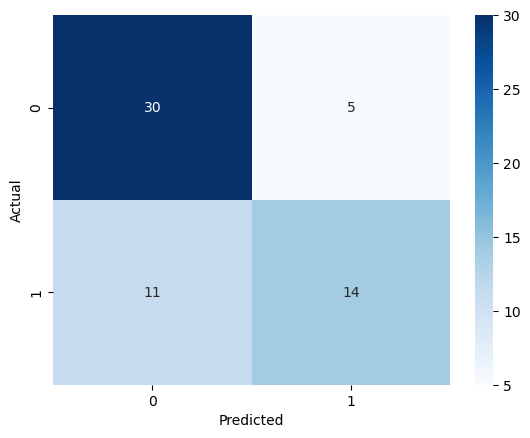

In [40]:
cm = confusion_matrix(y_test, gb_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Stacking model Adaboost dan Gradientboost dengan final_estimator Random Forest

In [41]:
from sklearn.ensemble import StackingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Buat model AdaBoost
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Gabungkan model dengan Stacking
estimators = [
    ('gradient_boosting', gb_model),
    ('adaboost', ada_model)
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42))

# Latih model stacking
stacking_model.fit(X_train, y_train)

# Prediksi pada set pengujian
stacking_predictions = stacking_model.predict(X_test)

# Evaluasi model stacking
print("Stacking Classifier:")
print("Accuracy:", accuracy_score(y_test, stacking_predictions))
print("Classification Report:\n", classification_report(y_test, stacking_predictions))

Stacking Classifier:
Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.87        35
           1       0.89      0.68      0.77        25

    accuracy                           0.83        60
   macro avg       0.85      0.81      0.82        60
weighted avg       0.84      0.83      0.83        60



## Confusion Matrix

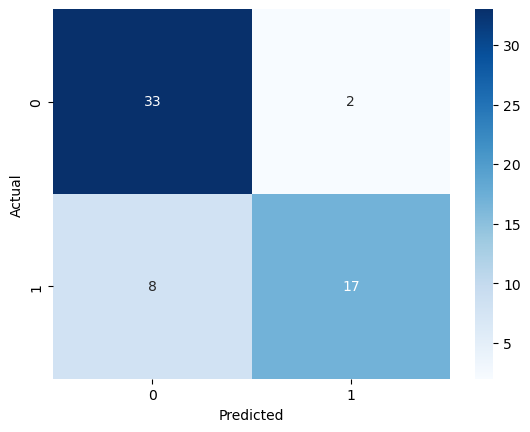

In [42]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, stacking_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
# Membuat DataFrame untuk hasil prediksi
result_df = pd.DataFrame(data=X_test.copy())
result_df['Actual'] = y_test
result_df['Predicted'] = stacking_predictions

# Menampilkan hasil DataFrame
result_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Actual,Predicted
281,70.0,0,582.00,0,40.0,0,76000.00,2.15,136,1,1,250,0,0
265,50.0,1,298.00,0,35.0,0,362000.00,0.90,140,1,1,240,0,0
164,45.0,0,1280.25,1,30.0,0,334000.00,1.10,139,1,0,129,1,0
9,80.0,1,123.00,0,35.0,1,388000.00,2.15,133,1,1,10,1,1
77,42.0,0,102.00,1,40.0,0,237000.00,1.20,140,1,0,74,0,0
278,50.0,1,1051.00,1,30.0,0,232000.00,0.70,136,0,0,246,0,0
93,60.0,1,154.00,0,25.0,0,210000.00,1.70,135,1,0,82,1,1
109,45.0,0,292.00,1,35.0,0,440000.00,1.30,142,1,1,88,0,0
5,90.0,1,47.00,0,40.0,1,204000.00,2.10,132,1,1,8,1,1
173,50.0,1,115.00,0,20.0,0,189000.00,0.80,139,1,0,146,0,0


## AdaboostClassifier denan base model Random Forest

In [44]:
from sklearn.ensemble import AdaBoostClassifier

# Misalnya, DecisionTreeClassifier digunakan sebagai model dasar
base_model = RandomForestClassifier(random_state=50)

# AdaBoostClassifier dengan DecisionTreeClassifier sebagai model dasar
boosting_model = AdaBoostClassifier(base_model, n_estimators=50, learning_rate=1.0, random_state=42, )

# Training boosting model
boosting_model.fit(X_train, y_train)

# Prediksi dengan boosting model
y_pred_boosting = boosting_model.predict(X_test)

# Evaluasi performa
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print(f"Accuracy of Boosting: {accuracy_boosting:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_boosting))

Accuracy of Boosting: 0.7500
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60



## Confusion Matrix

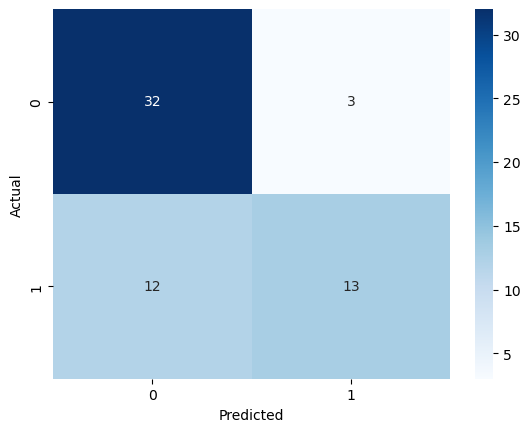

In [45]:
cm = confusion_matrix(y_test, y_pred_boosting)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 <h1 style="text-align:center;">Final Conclusion</h1>

## Dataset Conclusion

Dari semua analisa yang dilakukan dalam project kali ini yaitu prediksi keselamatan Pasien penyakit jantung. **!! Informasi yang dapat disimpulkan hanya berdasarkan dataset** 

Kesimpulan yang dapat ditarik adalah :
1. Perbandingan antara populasi baik yang mengalami pengurangan hemoglobin (anemia) atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi populasi yang meninggal lebih banyak yang tidak mengalami penurunan hemoglobin (anemia), begitupun untuk frekuensi populasi yang tidak meninggal lebih banyak yang tidak mengalamai penurunan hemoglobin (anemia).

2. Perbandingan antara seseorang baik yang mengidap diabetes atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mengidap diabetes, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mengidap diabetes.

3. Perbandingan antara seseorang baik yang mempunyai darah tinggi atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mempunyai darah tinggi, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mempunyai darah tinggi.

4. frekuensi seseorang yang meninggal lebih banyak berjenis kelamin pria dibandingkan wanita, begitupun dengan frekuensi seseorang yang tidak meninggal lebih banyak yang berjenis kelamin pria.

5. Perbandingan antara seseorang baik yang merokok atau tidak, cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak merokok, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak merokok

6. Kolom DEATH_EVENT menunjukan data yang imbalanced. Imbalnaced sendiri merupakan suatu keadaan dimana distribusi kelas data tidak seimbang, jumlah kelas data (instance) yang satu lebih sedikit atau lebih banyak dibanding dengan jumlah kelas data lainnya. Selanjutnya akan kami lakukan penanganan agar data menjadi seimbang

## Modeling Conclusion

1. Stacking model Adaboost dan Gradientboost dengan final_estimator Random Forest dapat menjadi alternatif model terbaik, dikarenakan memiliki false positive dan negative yang paling sedikit. Dan juga recall dan accuracy yang paling tinggi diantara model lainnya. 

2. Jika kebutuhan mengenai model adalah false negative yang paling krusial maka diperlukan menyesuaikan parameter seperti threshold untuk meminimalisir false negative. Tetapi hal itu mempengaruhi akurasi dari kinerja model.